<a href="https://colab.research.google.com/github/alessandro-lion/LearningPython/blob/main/paolocoletti_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
plt.style.use("seaborn")
import seaborn

<ipython-input-1-c9c9998d969b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
giorni_anno=253
df=yf.download("^SP500TR")["Adj Close"].pct_change(giorni_anno).dropna()

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

Date
1989-01-03    0.115733
1989-01-04    0.120648
1989-01-05    0.121916
1989-01-06    0.115156
1989-01-09    0.197495
                ...   
2024-03-19    0.328388
2024-03-20    0.355296
2024-03-21    0.347682
2024-03-22    0.328514
2024-03-25    0.347651
Name: Adj Close, Length: 8875, dtype: float64

In [4]:
primo_estratto=random.randint(0,len(df)-3*giorni_anno-1)
secondo_estratto=primo_estratto+giorni_anno
terzo_estratto=secondo_estratto+giorni_anno
print(df.index[primo_estratto],"->",round(df[primo_estratto]*100),"%")
print(df.index[secondo_estratto],"->",round(df[secondo_estratto]*100),"%")
print(df.index[terzo_estratto],"->",round(df[terzo_estratto]*100),"%")

2015-03-25 00:00:00 -> 13 %
2016-03-28 00:00:00 -> 1 %
2017-03-28 00:00:00 -> 18 %


In [5]:
quante_simulazioni=100
upper=len(df)-3*giorni_anno-1
m=np.zeros((100,quante_simulazioni))
m[0,:]=1
for c in range(quante_simulazioni):
    for t in range(1,100,3):
        e1=random.randint(0,upper)
        e2=e1+giorni_anno
        e3=e2+giorni_anno
        # print(t,c)
        m[t,c]=m[t-1,c]*(1+df[e1])
        m[t+1,c]=m[t,c]*(1+df[e2])
        m[t+2,c]=m[t+1,c]*(1+df[e3])

In [6]:
m

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.14898308e+00, 1.32838655e+00, 1.10725967e+00, ...,
        1.16039111e+00, 1.21873713e+00, 1.26351839e+00],
       [1.33769423e+00, 1.46891952e+00, 9.14234574e-01, ...,
        1.54203475e+00, 1.33974339e+00, 1.25037555e+00],
       ...,
       [6.45683189e+04, 1.72729156e+05, 2.23011136e+02, ...,
        5.41507137e+04, 9.52276071e+03, 8.08078909e+04],
       [7.73945020e+04, 1.44865071e+05, 2.43823679e+02, ...,
        6.36270079e+04, 1.16794303e+04, 8.18489228e+04],
       [8.97279492e+04, 1.41503824e+05, 2.70851963e+02, ...,
        8.06938413e+04, 1.30100951e+04, 1.13648715e+05]])

<Axes: >

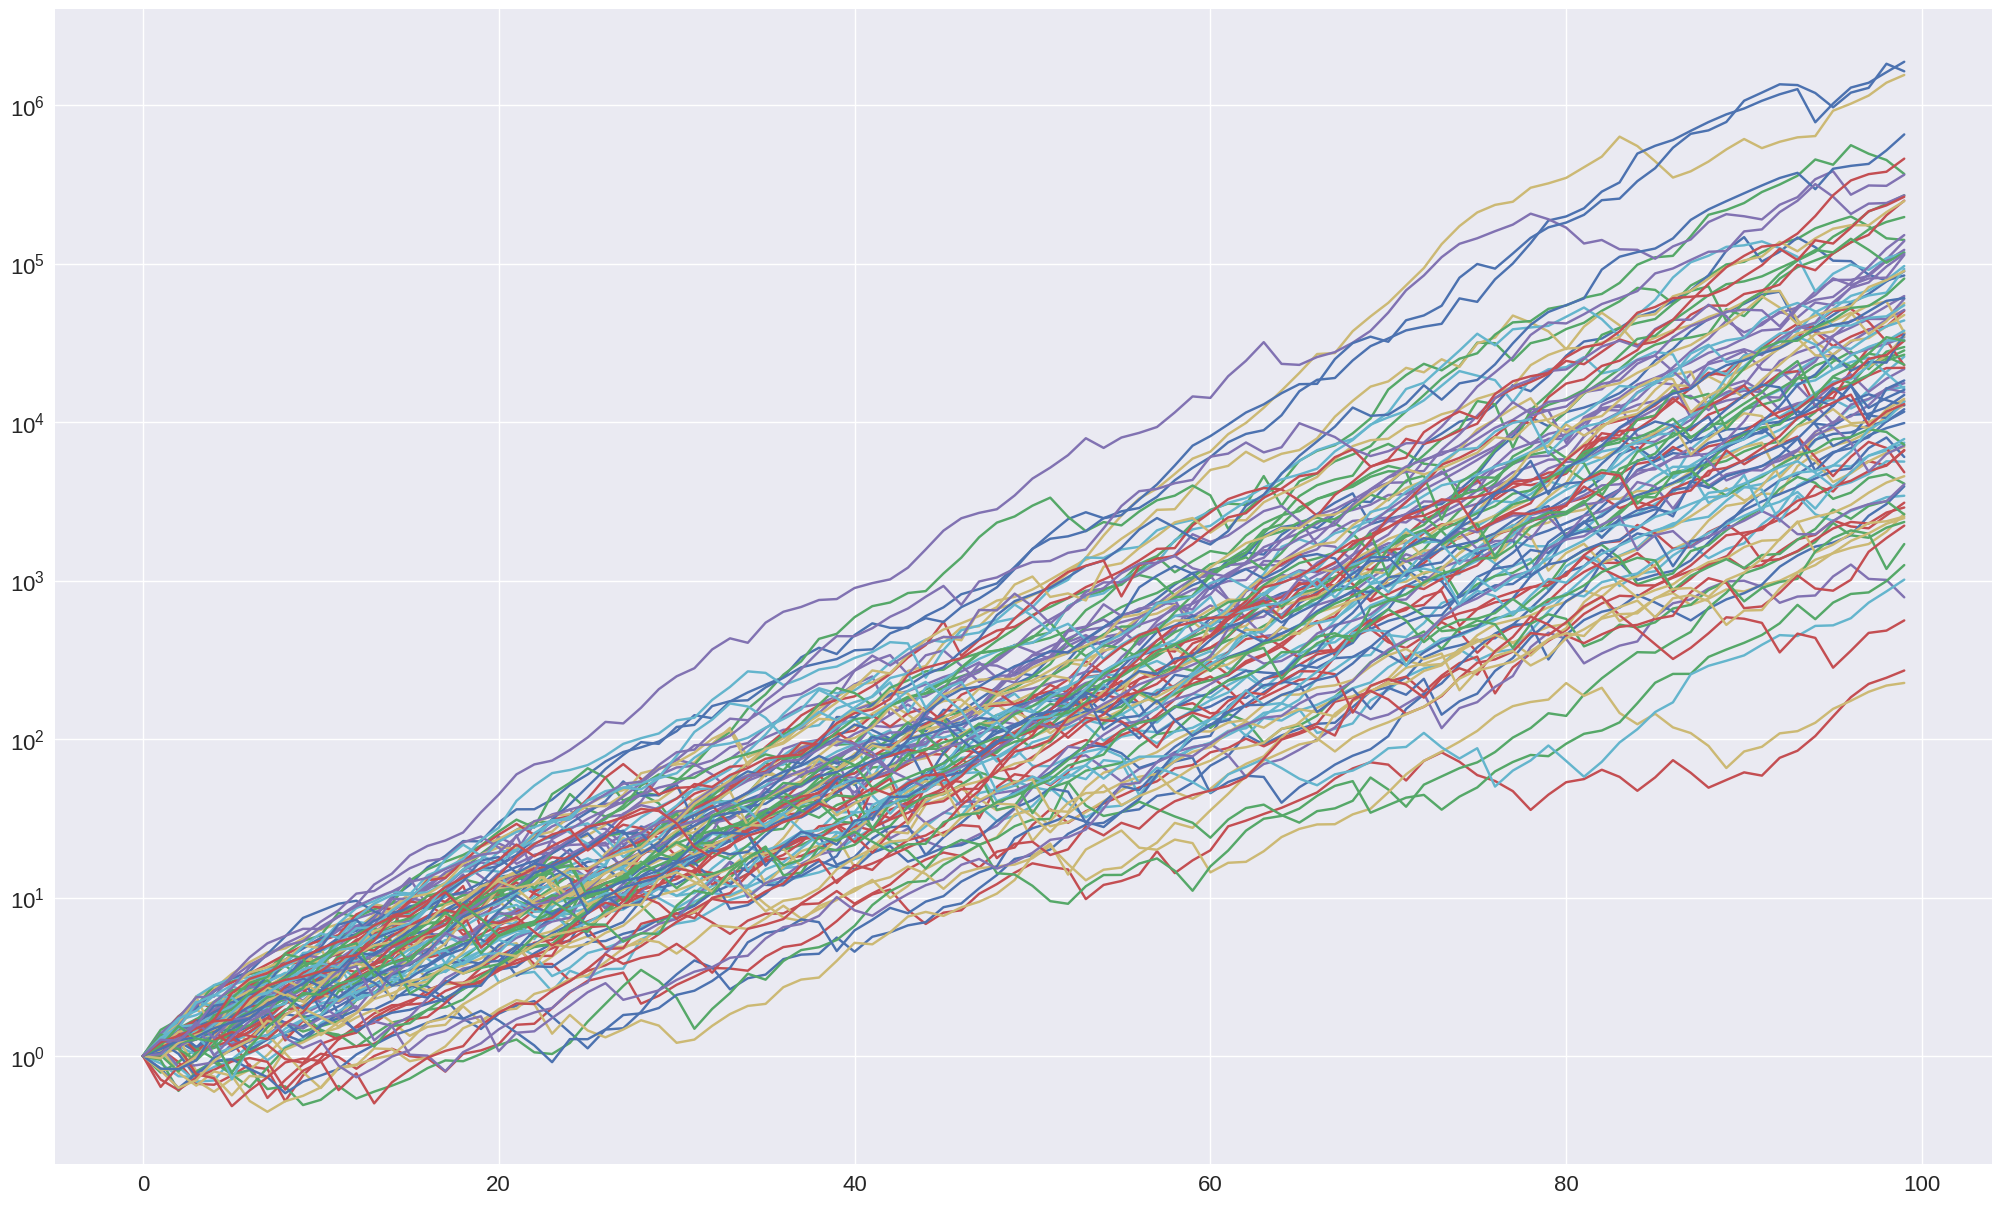

In [7]:
pd.DataFrame(m).plot(legend=None,logy=True,fontsize=16,figsize=(25,15))

In [8]:
quante_simulazioni=10000
upper=len(df)-3*giorni_anno-1
md=np.zeros((100,quante_simulazioni))
md[0,:]=1
m=np.zeros((100,quante_simulazioni))
m[0,:]=1
for c in range(quante_simulazioni):
    for t in range(1,100,3):
        e1=random.randint(0,upper)
        e2=e1+giorni_anno
        e3=e2+giorni_anno
        # print(t,c)
        md[t,c]=1+df[e1]
        md[t+1,c]=1+df[e2]
        md[t+2,c]=1+df[e3]
        m[t,c]=m[t-1,c]*(1+df[e1])
        m[t+1,c]=m[t,c]*(1+df[e2])
        m[t+2,c]=m[t+1,c]*(1+df[e3])

# Iniziamo finalmente l'analisi

In [9]:
capitale=700000
prelievo=2000*13
inflazione=0.03
bollo=0.002
anni_rendita=51 # per quanti anni resti in pensione, massimo 99!

ATTENZIONE. Rispetto al video ho aggiunto:
1. imposta di bollo
2. la tassa sulla tassa, dato che sto usando i soldi investiti per pagare le tasse

In [10]:
prelievi=np.zeros((100,))
prelievi[0]=prelievo
for t in range(1,100):
    prelievi[t]=prelievo*(1+inflazione)**t

fire=np.zeros((100,quante_simulazioni))
fire[0,:]=capitale-prelievi[0]
for t in range(1,100):
    tassa=np.zeros((quante_simulazioni,))
    tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
    tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
    fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

In [11]:
fire

array([[ 6.74000000e+05,  6.74000000e+05,  6.74000000e+05, ...,
         6.74000000e+05,  6.74000000e+05,  6.74000000e+05],
       [ 8.17593517e+05,  6.98968074e+05,  6.98975619e+05, ...,
         7.12694197e+05,  8.07485074e+05,  7.84506333e+05],
       [ 1.03132134e+06,  7.47234889e+05,  7.12696308e+05, ...,
         6.94780095e+05,  9.95948115e+05,  8.63629468e+05],
       ...,
       [ 3.62045656e+10,  3.78618646e+09, -1.70183771e+09, ...,
        -1.12393411e+09,  1.47228399e+10,  2.74148686e+09],
       [ 4.91083749e+10,  3.64704840e+09, -1.96381907e+09, ...,
        -1.35492580e+09,  1.35116560e+10,  3.13422580e+09],
       [ 3.96453234e+10,  4.64853417e+09, -2.04901905e+09, ...,
        -1.14481580e+09,  1.44855552e+10,  2.03983372e+09]])

In [12]:
pd.Series(fire[anni_rendita,:]>=0).value_counts()/quante_simulazioni*100

True     79.9
False    20.1
dtype: float64

In [13]:
summaryTable=pd.DataFrame(np.zeros((50,20)),columns=list(range(100000,2000001,100000)),index=list(range(1,51)))

In [14]:
for c in range(100000,2000001,100000):
    fire[0,:]=c
    for t in range(1,100):
        tassa=np.zeros((quante_simulazioni,))
        tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
        tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
        fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

    for a in range(1,51):
        summaryTable.loc[[a],[c]]=round((fire[a,:]>=0).mean(),2)


<Axes: >

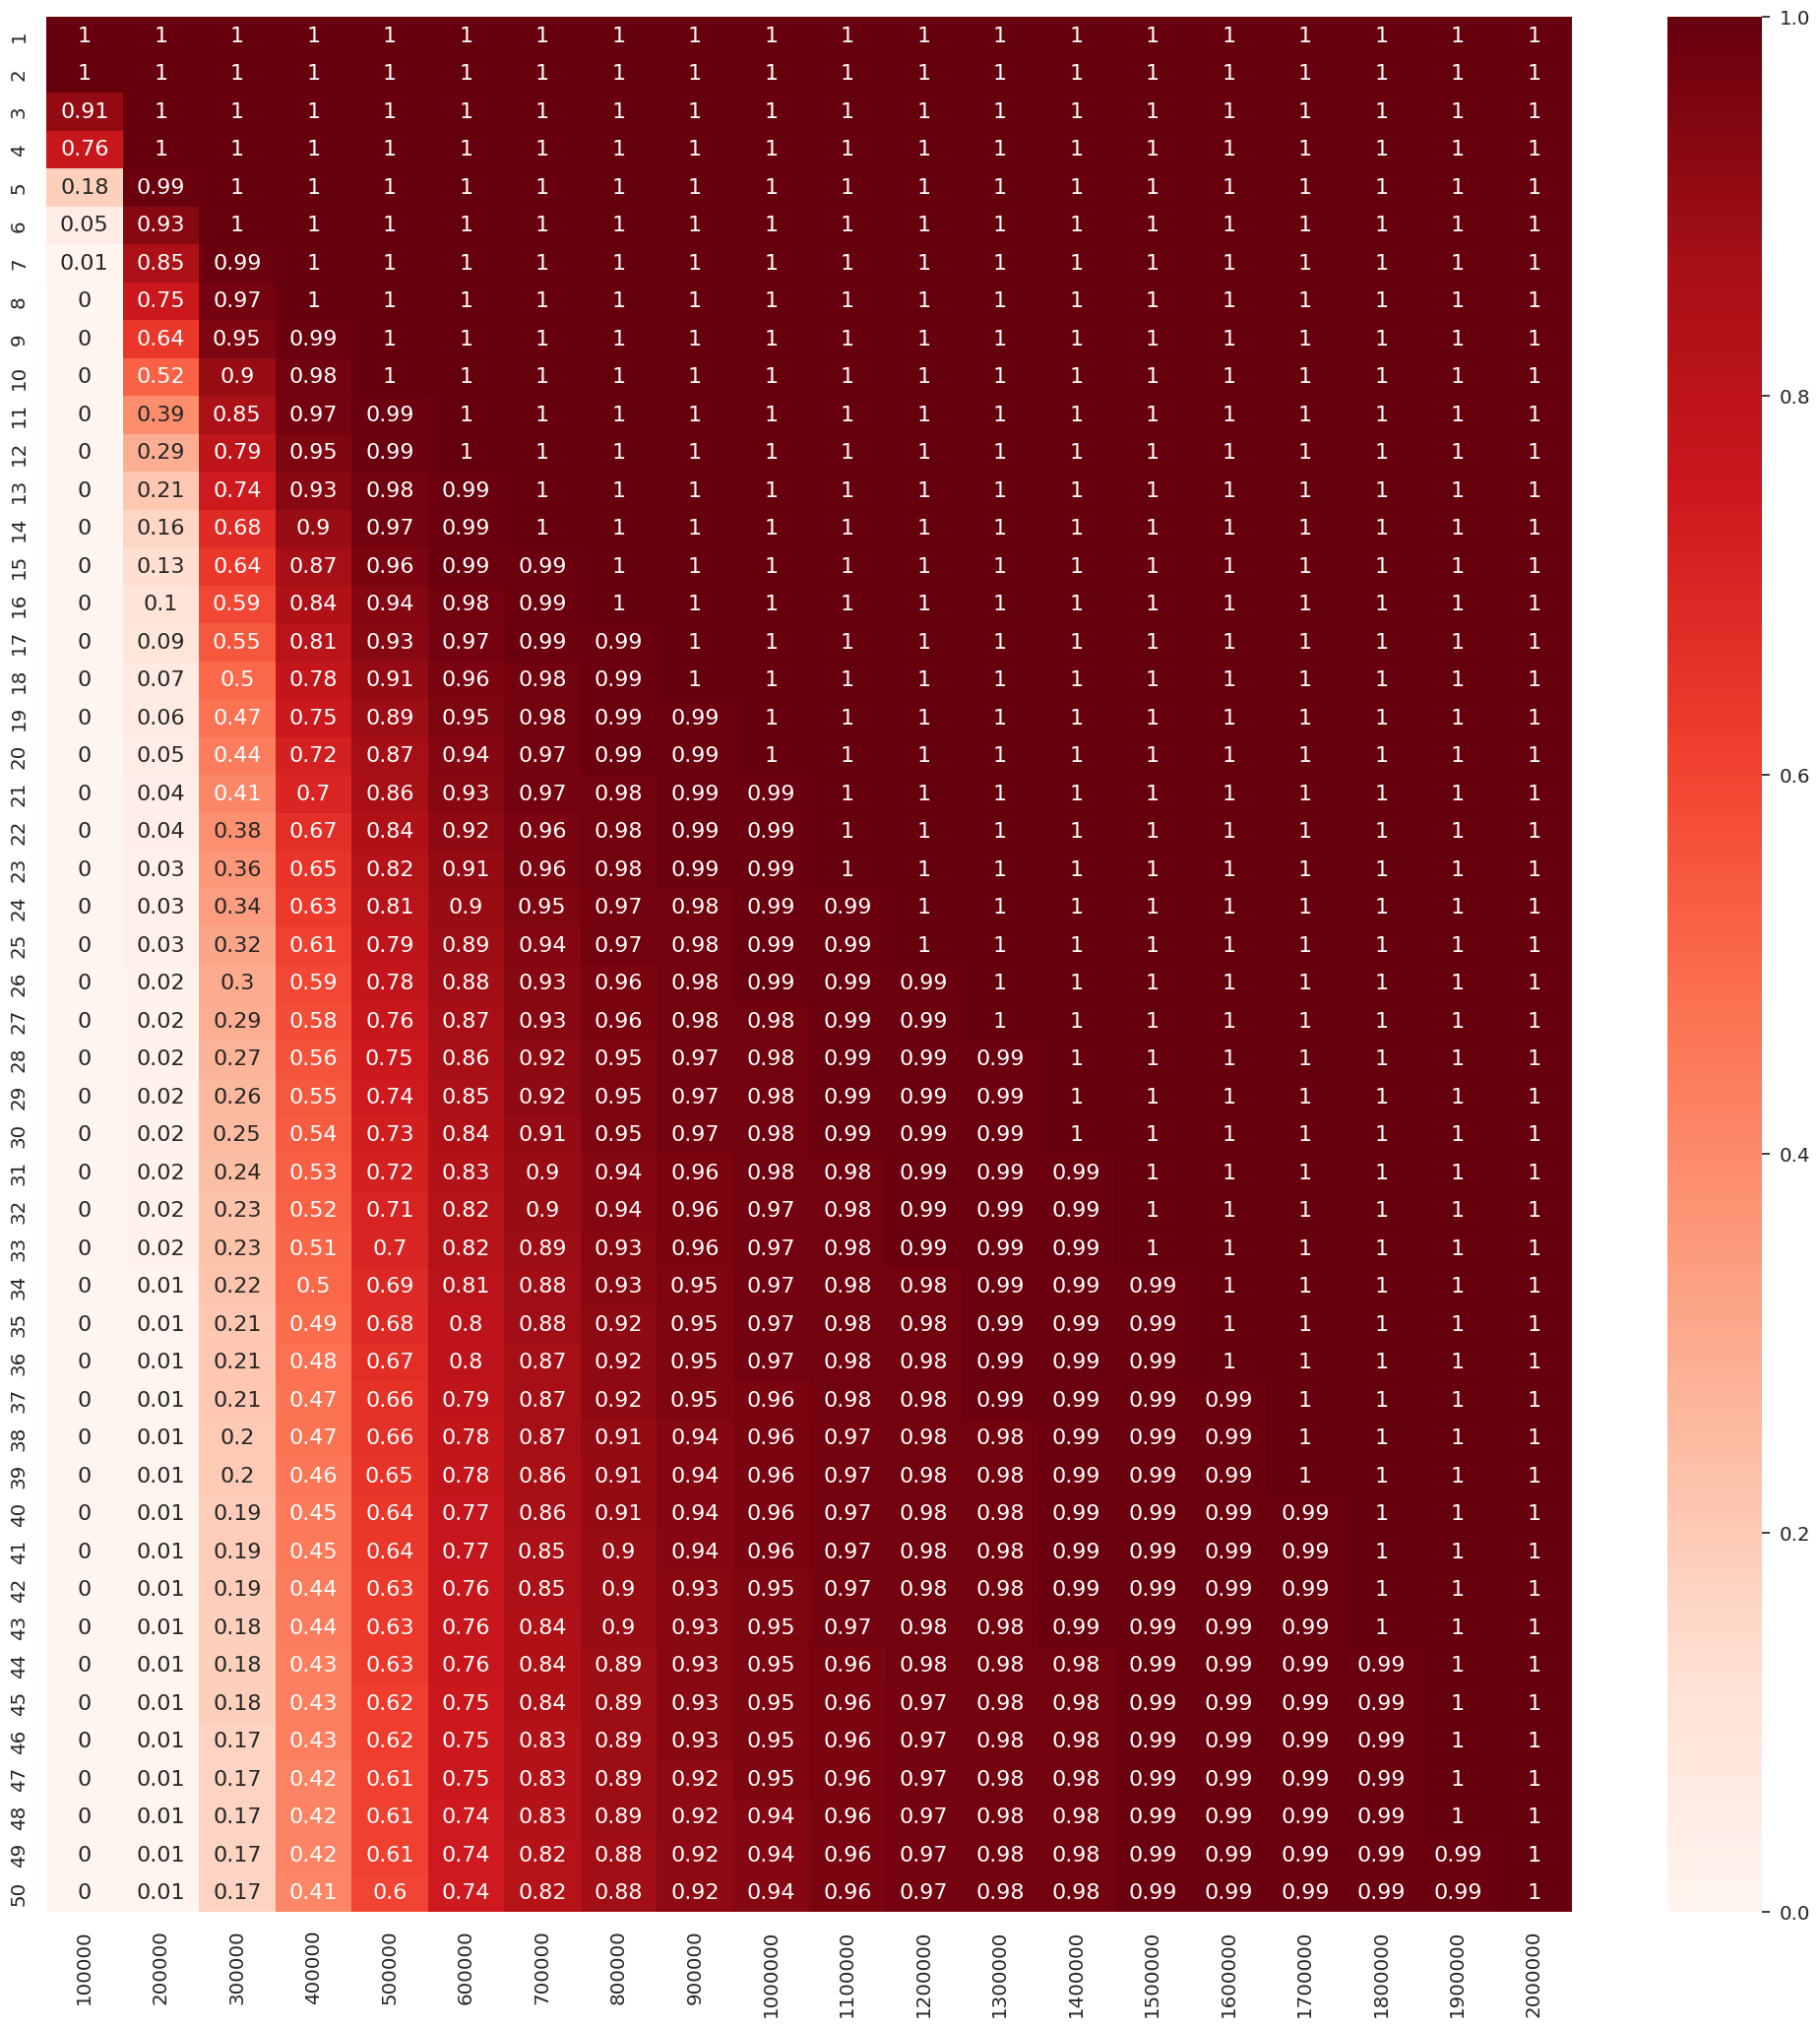

In [15]:
plt.figure(figsize=(25,25))
seaborn.set(font_scale=1.3)
seaborn.heatmap(summaryTable,cmap="Reds", annot=True, annot_kws={"size":16})

# E inseriamo anche la pensione

In [16]:
capitale=700000
prelievo=2000*13
inflazione=0.03
bollo=0.002
anni_rendita=20 # la somma dei due anni_rendita massimo 99
prelievo2=800*13
anni_rendita2=30 # la somma dei due anni_rendita massimo 99

In [17]:
prelievi=np.zeros((100,))
prelievi[0]=prelievo
for t in range(1,anni_rendita):
    prelievi[t]=prelievo*(1+inflazione)**t
for t in range(anni_rendita,100):
    prelievi[t]=prelievo2*(1+inflazione)**t

fire=np.zeros((100,quante_simulazioni))
fire[0,:]=capitale
for t in range(1,100):
    tassa=np.zeros((quante_simulazioni,))
    tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
    tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
    fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

In [18]:
fire

array([[ 7.00000000e+05,  7.00000000e+05,  7.00000000e+05, ...,
         7.00000000e+05,  7.00000000e+05,  7.00000000e+05],
       [ 8.50240309e+05,  7.26991339e+05,  7.26999179e+05, ...,
         7.41253243e+05,  8.39738415e+05,  8.15864942e+05],
       [ 1.07375464e+06,  7.78364793e+05,  7.42426305e+05, ...,
         7.23768420e+05,  1.03697382e+06,  8.99360191e+05],
       ...,
       [ 4.15542776e+10,  5.16676460e+09, -5.18647043e+08, ...,
         1.75015336e+08,  1.59361506e+10,  4.61969452e+09],
       [ 5.63652744e+10,  4.97750582e+09, -5.98548329e+08, ...,
         2.10630914e+08,  1.46255873e+10,  5.28231901e+09],
       [ 4.55043282e+10,  6.34497000e+09, -6.24578671e+08, ...,
         1.77603992e+08,  1.56802243e+10,  3.43870996e+09]])

In [19]:
pd.Series(fire[anni_rendita+anni_rendita2,:]>=0).value_counts()/quante_simulazioni*100

True     92.96
False     7.04
dtype: float64

In [20]:
summaryTable=pd.DataFrame(np.zeros((50,20)),columns=list(range(100000,2000001,100000)),index=list(range(1,51)))

In [21]:
for c in range(100000,2000001,100000):
    fire[0,:]=c
    for t in range(1,100):
        tassa=np.zeros((quante_simulazioni,))
        tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
        tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
        fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

    for a in range(1,51):
        summaryTable.loc[[a],[c]]=round((fire[a,:]>=0).mean(),2)


<Axes: >

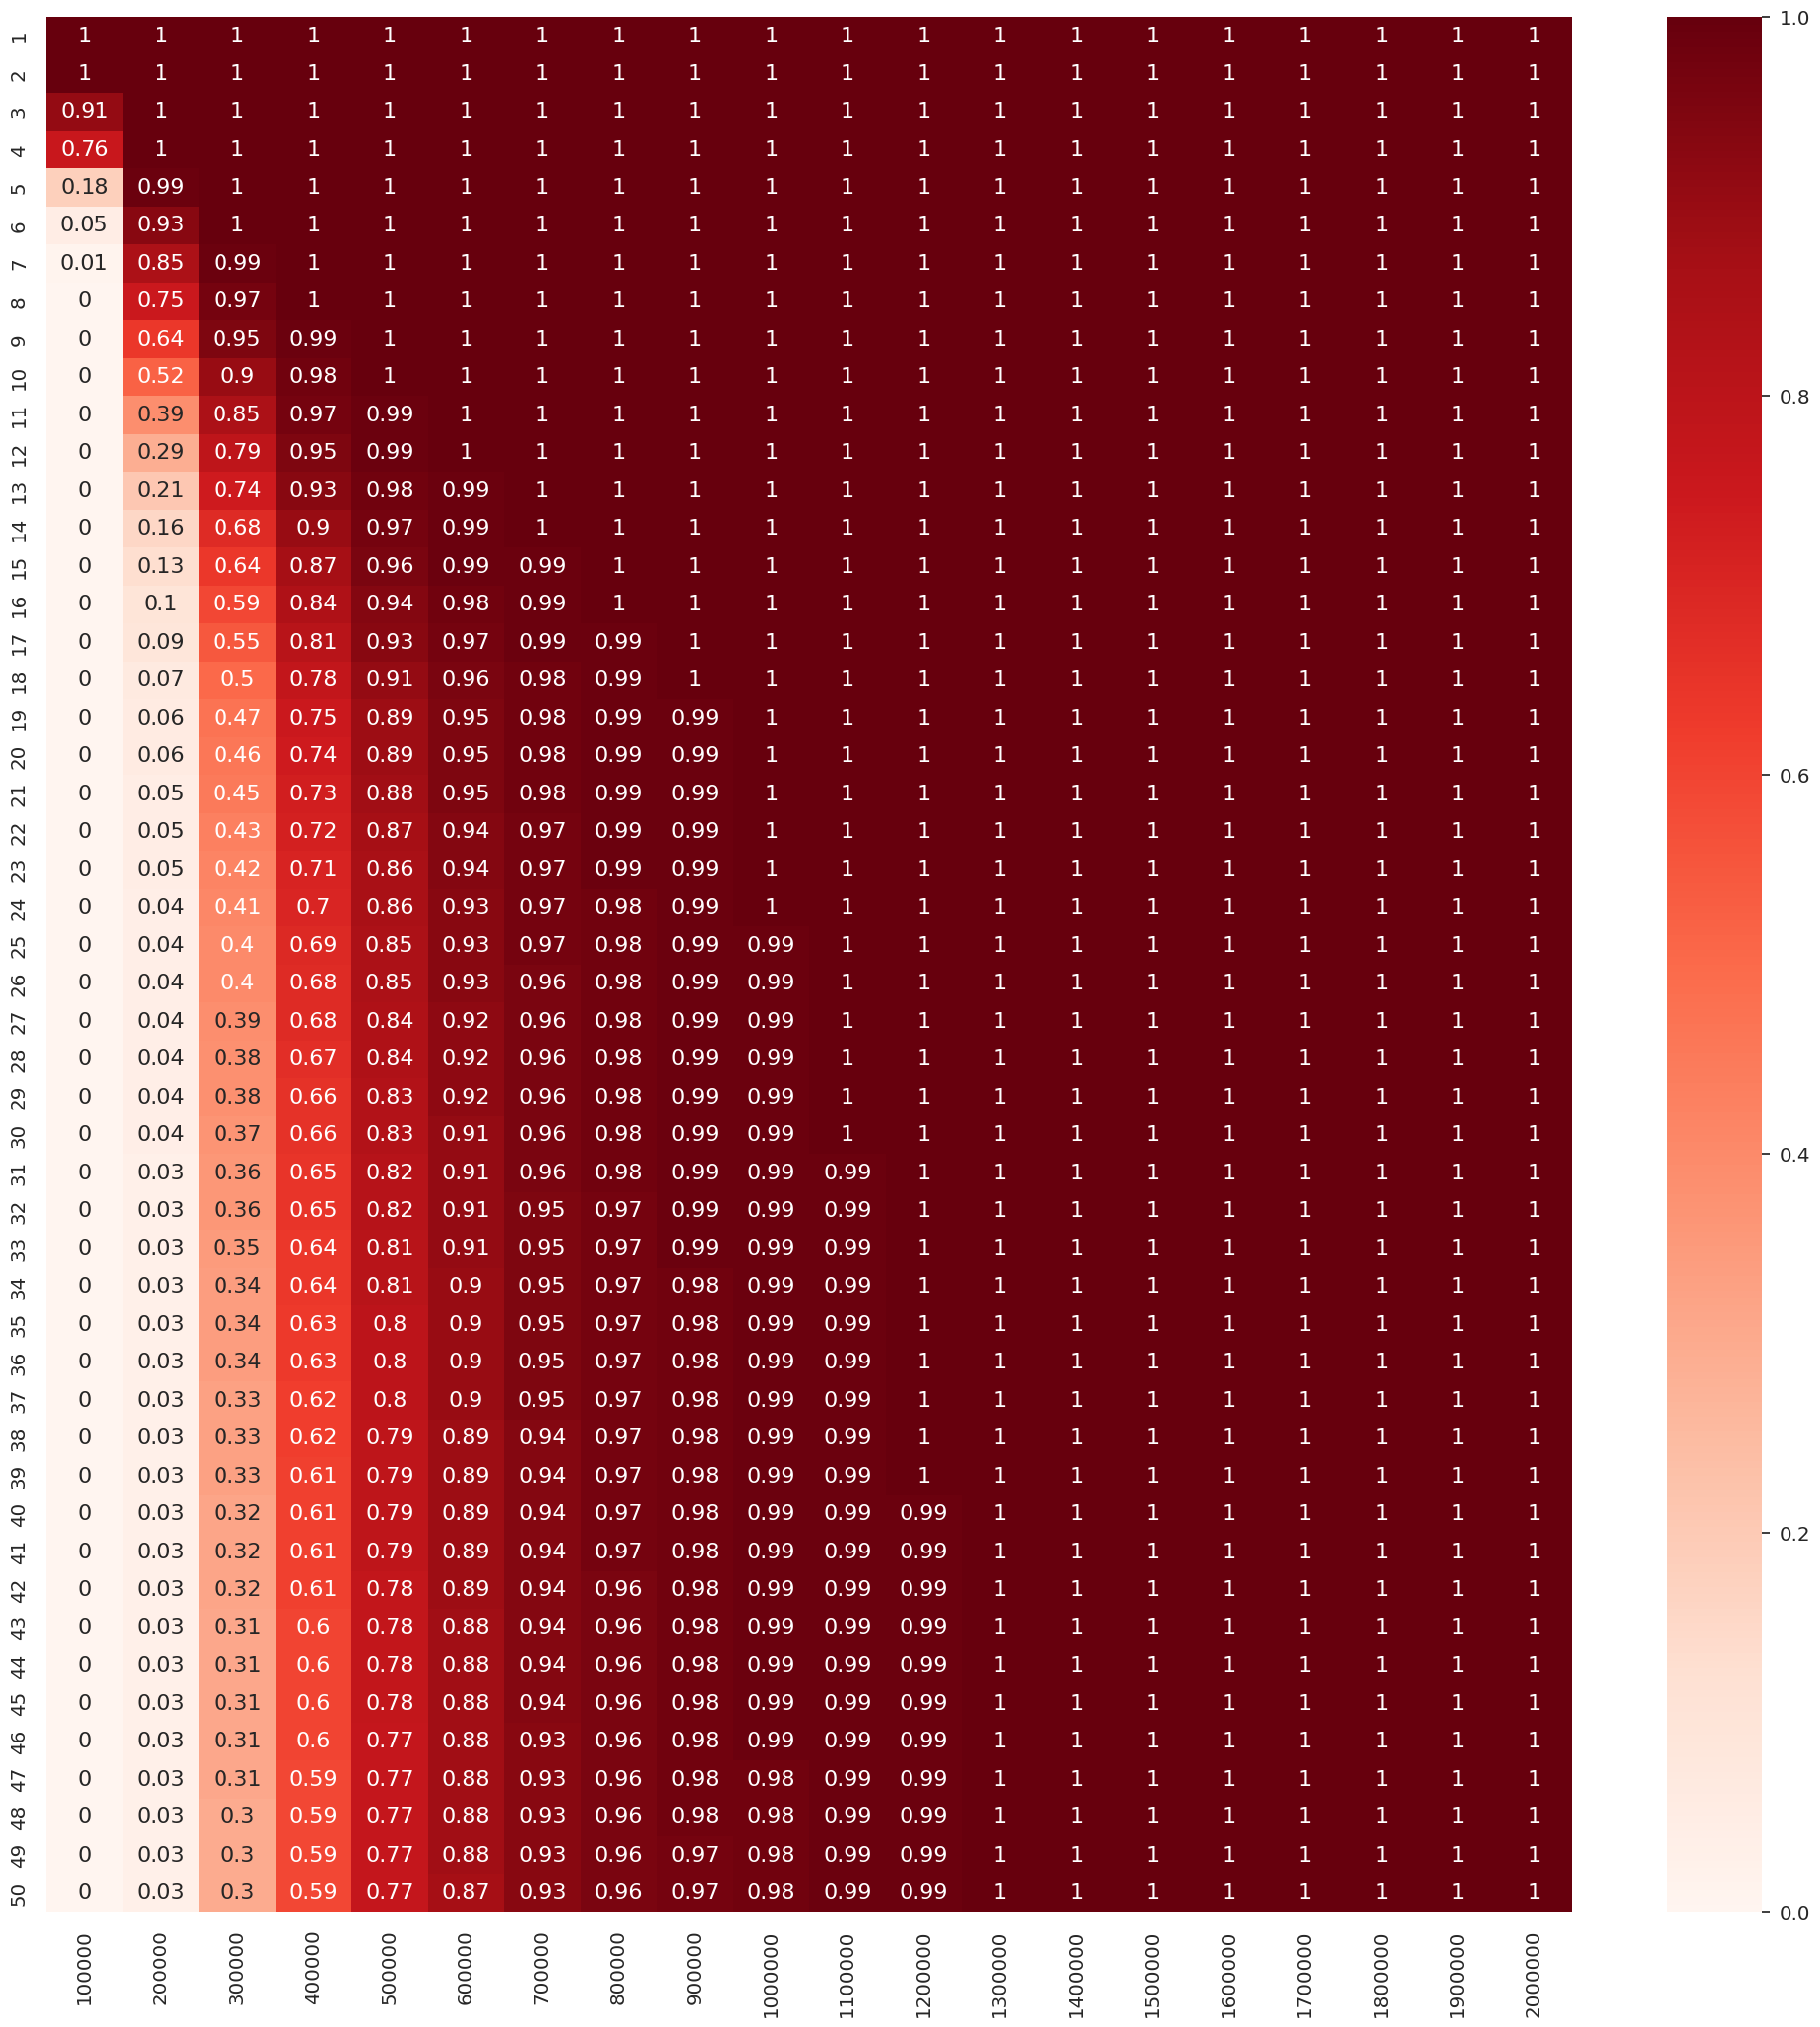

In [22]:
plt.figure(figsize=(25,25))
seaborn.set(font_scale=1.3)
seaborn.heatmap(summaryTable,cmap="Reds", annot=True, annot_kws={"size":16})